# Predicting MPG of a Car using Linear Regression

In [1]:
#Importing all the necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To enable plotting in Jupyter Notebook
%matplotlib inline

In [2]:
#Read the csv file into a pandas dataframe
df = pd.read_csv("Car-mpg- Dataset.csv")

In [3]:
#To verify if the file has been read
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


The column "car_name" can be dropped from the dataframe because it is not a good predictor of mileage. This is because mileage varies from one manufacturer to another. Also within the same manufacturer, the mileage varies from one variant to an other.

In [4]:
#Dropping the column "car_name"
df.drop("car_name", axis=1, inplace=True)
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [5]:
#To print the size of the dataframe
df.shape

(398, 9)

The dataframe has 398 rows and 9 columns. 'mpg' is the target variable and the rest are independent variables. 

In [6]:
#To print the data type of the columns
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
dtype: object

All the variables are of numerical data type except for the column 'hp'. This has to be converted into a numerical data type before building the model. 

Insights from EDA: By doing an Explorartory Data Analysis on the column 'hp' we find that the column contains '?' as values for few records. These '?' have to be imputed with meaningful values or be removed.

In [7]:
#To print the records with '?' as values in "hp" column
df[df["hp"]=='?']

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
32,25.0,4,98.0,?,2046,19.0,71,1,1
126,21.0,6,200.0,?,2875,17.0,74,1,0
330,40.9,4,85.0,?,1835,17.3,80,2,1
336,23.6,4,140.0,?,2905,14.3,80,1,1
354,34.5,4,100.0,?,2320,15.8,81,2,1
374,23.0,4,151.0,?,3035,20.5,82,1,1


Replacing '?' with median of the column "hp". This is because median is least affected by outliers in the column which are yet to be treated.  

In [8]:
#Replacing the '?' in "hp" column with 'NaN'
df.replace('?', np.nan, inplace=True)

In [9]:
#To verify if the replacing operation is as expected
df[df.hp.isnull()]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
32,25.0,4,98.0,NaN,2046,19.0,71,1,1
126,21.0,6,200.0,NaN,2875,17.0,74,1,0
330,40.9,4,85.0,NaN,1835,17.3,80,2,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1
354,34.5,4,100.0,NaN,2320,15.8,81,2,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1


In [10]:
#Replacing the 'NaN' in "hp" column with its median
df = df.apply(lambda x: x.fillna(x.median(), axis=0))

In [11]:
#To verify if there are any non numeric entries in the dataframe
df[df.isnull()].count()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

In [12]:
#Using info() to generate information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


The dataframe does not have any missing values.

All the columns are of quantitative data type except for the column "hp". Since the "hp" column is rectified, we can now change its data type to quantitative form.

In [13]:
#Converting the data type of the column 'hp' into quantitative form
df["hp"] = df.hp.astype('float64')

In [14]:
#To verify the conversion operation was successful
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
dtype: object

Insights from EDA: 'origin' is a numerical column but it contains categorical information. The numbers in the column are labels which represent a subcontinent category ('American', 'European', 'Asian') to which the car belongs to. Similarly 'car_type' has numerical labels 0 and 1 representing another categorical information whether the car is automatic or manual. The column 'origin' have to be handled before modeling else the algorithm assumes there is an order maintained and assigns weights to the values within the column 'origin'.

In [15]:
#Replacing 1 with 'America', 2 with 'Europe', 3 with 'Asia'
df['origin'] = df['origin'].replace({1 : 'America', 2 : 'Europe', 3 : 'Asia'})

In [16]:
#To verify if the replacement operation is as expected
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130.0,3504,12.0,70,America,0
1,15.0,8,350.0,165.0,3693,11.5,70,America,0
2,18.0,8,318.0,150.0,3436,11.0,70,America,0
3,16.0,8,304.0,150.0,3433,12.0,70,America,0
4,17.0,8,302.0,140.0,3449,10.5,70,America,0


The "origin" column is still a qualitative data type column. It has to be converted to quantitative data type before building the model.

In [17]:
#Converting "origin" column into a quantitative data type column using get_dummies()
df = pd.get_dummies(df, columns=["origin"])
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0


In [18]:
#To print the shape of the dataframe
df.shape

(398, 11)

The columns "cyl", "yr", "car_type", "origin_America", "origin_Asia", "origin_Europe" are numericals columns that contain categorical information. Converting these columns to 'category' type.

In [19]:
#Converting "cyl", "yr", "car_type", "origin_America", "origin_Asia", "origin_Europe" to 'categorical' type
df["cyl"] = df.cyl.astype('category')
df["yr"] = df.yr.astype('category')
df["car_type"] = df.car_type.astype('category')
df["origin_America"] = df.origin_America.astype('category')
df["origin_Asia"] = df.origin_Asia.astype('category')
df["origin_Europe"] = df.origin_Europe.astype('category')

In [20]:
#To print the data types of the column
df.dtypes

mpg                float64
cyl               category
disp               float64
hp                 float64
wt                   int64
acc                float64
yr                category
car_type          category
origin_America    category
origin_Asia       category
origin_Europe     category
dtype: object

In [21]:
#Descriptive Statistics of the dataframe
df.describe()

,mpg,disp,hp,wt,acc
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,104.304020,2970.424623,15.568090
std,7.815984,104.269838,38.222625,846.841774,2.757689
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,104.250000,76.000000,2223.750000,13.825000
50%,23.000000,148.500000,93.500000,2803.500000,15.500000
75%,29.000000,262.000000,125.000000,3608.000000,17.175000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


Interpretation:

1) For the column 'mpg', the mean and the median almost overlap each other. The tail length on the left side of the distribution is 8.5 units and the tail length on the right side of the distribution is 17 units. Not much of a difference. 

2) For the column 'disp', the mean is on the right side of median and they are significantly away from each other. This suggests there could be extreme values on the right side of the distribution. The tail length on the left is 36.25 units and the tail length on the right is 193 units. This also suggests the presence of extremes values on the right side of the distribution. 

3) The column 'hp' too has mean on the right side of the median. They do not overlap each other. But however they are not significantly away. The tail length on the left is 30 units while the tail length on the right is 105 units. The right side tail length is more than thrice the tail length on the left. Possibly Outliers!

4) The column 'wt' too has mean on the right side of median and they are significantly away from each other. The tail length on the left is 610.75 units. The tail length on the right is 1532 units which is more than twice the tail length on the left. Possibly outliers on the higher side of the distribution!

5) For the column 'acc', the mean and the median almost overlap each other. The left side tail length is 5.825 units while the right side tail length is 7.625 units. Not a significant difference in tail lengths. 

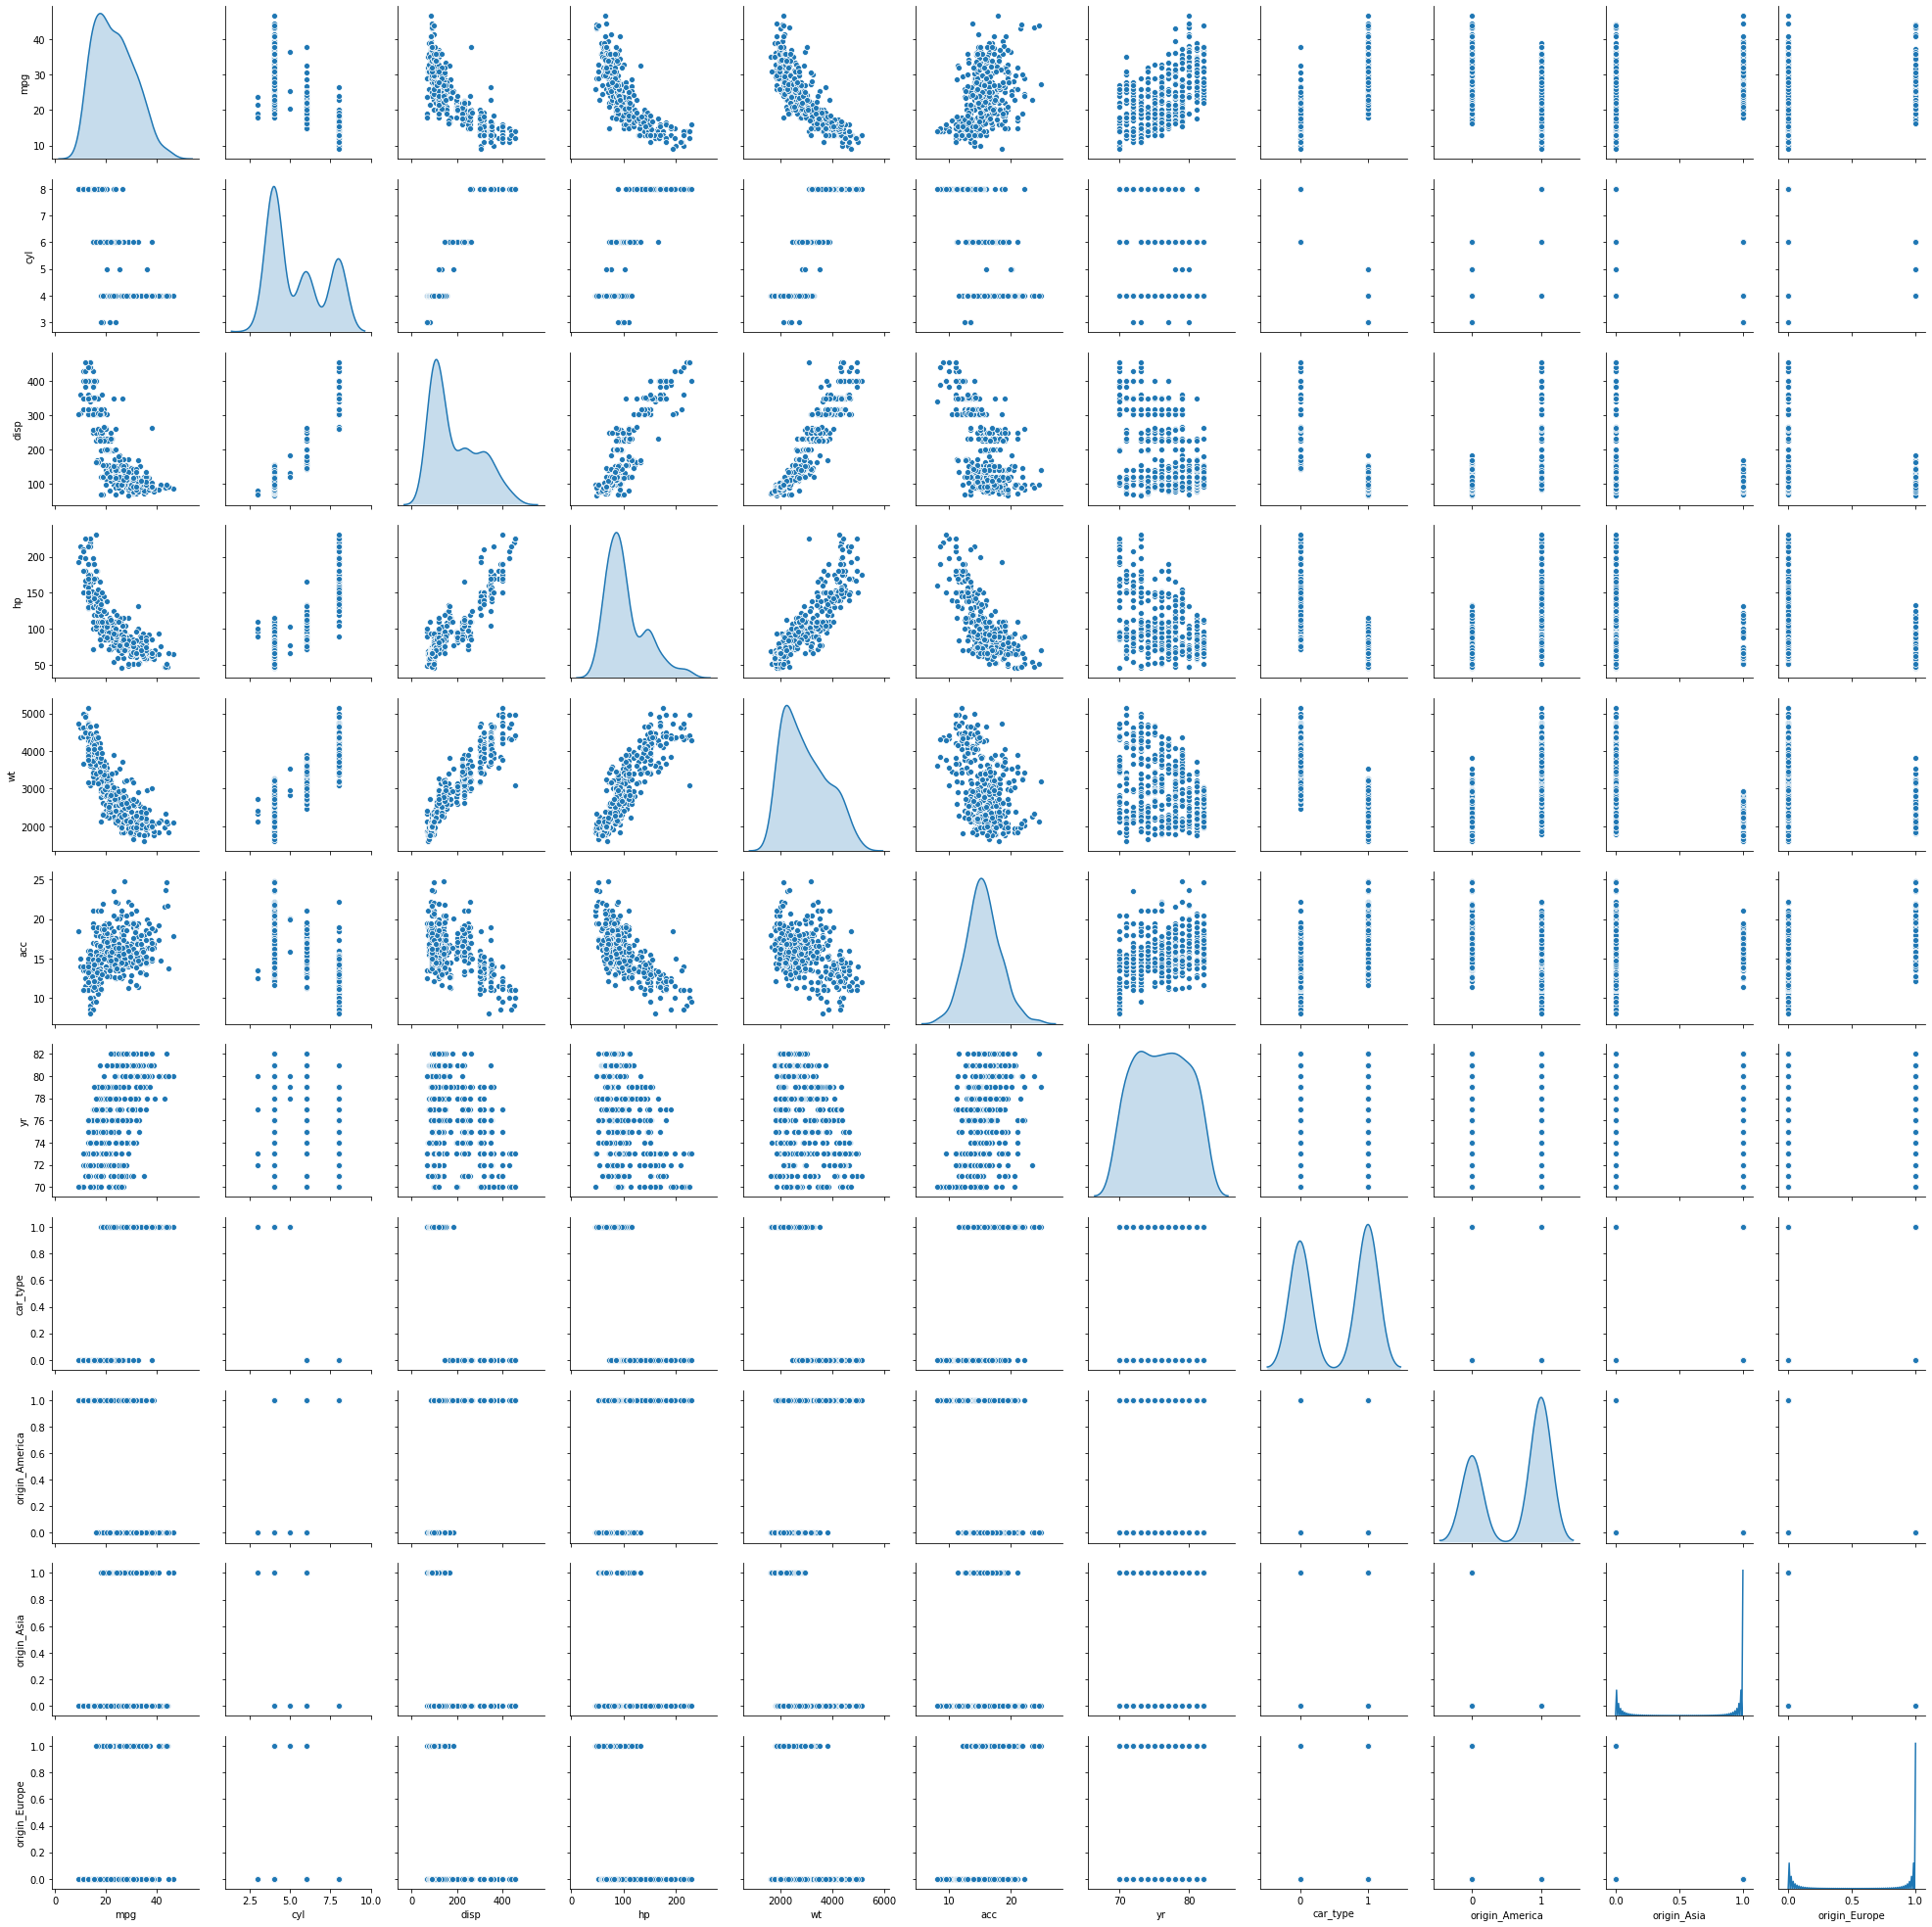

In [22]:
#Pairplot of the dataframe
sns.pairplot(data=df, diag_kind='kde')

#### Interpretation of the diagonals (Univariate Analysis):
#1) The 'mpg' column has no issues with respect to its distribution and presence of outliers.
#2) The columns 'cyl', 'disp', 'hp', 'wt' have multiple peaks in their distributions. Multiple peaks in a distribution imply different processes that generate the data. A model represents a process in the real world. Therefore building a model for two difeerent processes does no good to any of the process. Ideally, the dataset have to be split based on these columns and build each model for each data set. 
#3) The 'acc' column approximates a normal distribution. No issues in its distribution.
#4) The 'yr' column too has overlapping multiple distributions suggesting data from different gaussians.
#5) Cars that are automatically geared are higher in number than the cars that are manually geared in the column 'car_type'.


#### Interpretation of the off-diagonals (Bivariate Analysis):
##### 'Target' vs 'Independent'
#1) 'cyl' vs 'mpg' - As the number of cylinders decreases, the mpg increases. Majority of the cars have number of cylinders in the order 4 > 6 > 8. Also cars with cylinders 4 have a higher range of mpg followed by cars with 6 and 8 cylinders. 
#2) The columns 'disp', 'hp', 'wt' have a negative relationship with 'mpg'. Also the relationship is non linear. 
#3) 'acc' vs 'mpg' - The distribution is cloud-like showing neither a +ve or a -ve relationship. This suggests 'acc' is a poor predictor of 'mpg'. 
#4) 'yr' vs 'mpg' - As the year advances, the mpg improves showing a linear trend. 
#5) 'car_type' vs 'mpg' - The range of mpg is higher for cars that are automatically geared than the cars that are manually geared. 
#6) Cars from Asia and Europe have a higher range of mpg than the cars from America. Also cars from Asia and Europe have a similar range of mpg. 

##### 'cyl' vs 'other independent columns'

#1) The column 'cyl' shows a positive trend with respect to the columns 'disp', 'hp', 'wt'. It shows a negative trend with the column 'acc' as expected. 
#2) 'cyl' vs 'yr' - Most of the cars sold recently had cylinders 4, 6 and then 8 in them. 
#3) 'cyl' vs 'car_type' - Cars that were automatically geared operated with less number of cylinders. 
#4) American cars worked with the highest number of cylinders compared to Asian and European cars. 

##### 'disp' vs 'other independent columns'

#1) The column 'disp' shows a positive trend with respect to the columns 'hp' and 'wt'.
#2) 'disp' vs 'acc' - The plot shows a negative trend. The distribution is spread out especially for lower values of 'disp'.
#3) 'disp' vs 'yr' - As the year advances, the range of displacement of cars sold shrink.
#4) 'disp' vs 'car_type' - Automatic cars have smaller range of 'disp' than the manual cars. 

##### 'hp' vs 'other independent columns'

#1) 'hp' vs 'wt' - The plot shows a positive linear trend.
#2) 'hp' vs 'acc' - The plot shows a non linear negative trend. 
#3) 'hp' vs 'yr' - As the year advances, the range of 'hp' of cars sold shrink.  
#4) 'hp' vs 'car_type' - Automatic cars have a smaller range of 'hp' than the manual cars. 

##### 'wt' vs 'other independent columns'

#1) 'wt' vs 'acc' - The distribution is cloud like showing neither a positive trend or a negative trend. 
#2) 'wt' vs 'yr' - As the year advances, the range of 'wt' of cars sold shrink.
#3) 'wt' vs 'car_type' - Manual cars are heavier than the automatic cars. 

##### 'acc' vs 'other independent columns'

#1) 'acc' vs 'yr' - As the year advances, the acceleration of cars improve.
#2) 'acc' vs 'car_type' - Both manual and automatic cars more or less have the same range of acceleration. 

### Understanding the correlation between the variables

In [23]:
#Correlation of the variables
df.corr()

,mpg,disp,hp,wt,acc
mpg,1.000000,-0.804203,-0.773453,-0.831741,0.420289
disp,-0.804203,1.000000,0.895778,0.932824,-0.543684
hp,-0.773453,0.895778,1.000000,0.862442,-0.686590
wt,-0.831741,0.932824,0.862442,1.000000,-0.417457
acc,0.420289,-0.543684,-0.686590,-0.417457,1.000000


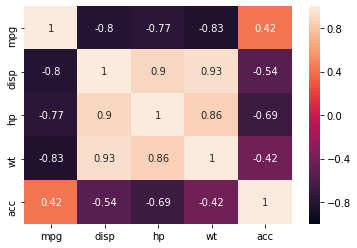

In [24]:
#Heatmap of the correlation matrix
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

#### Interpretation:
#1) All the columns except 'acc' have a strong negative relationship with the target column 'mpg'. The correlation between 'acc' and 'mpg' is 0.42. Further research has to be carried out whether this relationship is real or a statistical fluke.
#2) The independent attributes 'disp', 'hp', 'wt' are strong correlated with each other. These 3 attributes can be reduced to one dimension using PCA.
#3) Also the independent attributes 'disp', 'hp', 'wt' have a weak relationship with 'acc'.
#4) Dropping 'acc' column can be considered. 

### Creating Train & Test Set

In [25]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.25, random_state=1)

In [26]:
#Size of Train set & Test set
print("Training Set Size:", (train_set.shape))
print("Test Set Size:", (test_set.shape))

Training Set Size: (298, 11)
Test Set Size: (100, 11)


### EDA on the Training Set

In [27]:
train_set.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
192,22.0,6,250.0,105.0,3353,14.5,76,0,1,0,0
27,11.0,8,318.0,210.0,4382,13.5,70,0,1,0,0
89,15.0,8,318.0,150.0,3777,12.5,73,0,1,0,0
310,38.1,4,89.0,60.0,1968,18.8,80,1,0,1,0
73,13.0,8,307.0,130.0,4098,14.0,72,0,1,0,0


In [29]:
#Using info() to generate information about the train_set
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 192 to 37
Data columns (total 11 columns):
mpg               298 non-null float64
cyl               298 non-null category
disp              298 non-null float64
hp                298 non-null float64
wt                298 non-null int64
acc               298 non-null float64
yr                298 non-null category
car_type          298 non-null category
origin_America    298 non-null category
origin_Asia       298 non-null category
origin_Europe     298 non-null category
dtypes: category(6), float64(4), int64(1)
memory usage: 17.0 KB


In [28]:
#Descriptive Statistics on the Training Set
train_set.describe()

,mpg,disp,hp,wt,acc
count,298.000000,298.000000,298.000000,298.000000,298.000000
mean,23.587584,191.050336,103.411074,2958.147651,15.687919
std,7.949407,101.968739,37.529378,841.711899,2.752065
min,9.000000,70.000000,46.000000,1613.000000,8.500000
25%,17.500000,105.000000,75.000000,2222.000000,14.000000
50%,23.000000,146.000000,93.500000,2801.000000,15.500000
75%,29.875000,258.000000,121.500000,3556.000000,17.475000
max,46.600000,455.000000,230.000000,5140.000000,24.600000


##### Detecting the range of outliers in the column 'disp', 'hp', 'wt' and 'acc'


In [30]:
#Identifying Outliers in the column 'disp'
q3 = 258.000000
q1 = 105.000000
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'disp'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 487.5
The Lowest possible value: 28.5


In [33]:
train_set[train_set['disp'] > 487.5] #No Outliers in the higher range 

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe


In [34]:
train_set[train_set['disp'] < 28.5] #No Outliers in the lower range

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe


In [35]:
#Identifying Outliers in the column 'hp'
q3 = 121.500000
q1 = 75.000000
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'disp'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 191.25
The Lowest possible value: 51.75


In [36]:
train_set[train_set['hp'] > 191.25] #8 outliers records have been identified in the higher range

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
27,11.0,8,318.0,210.0,4382,13.5,70,0,1,0,0
8,14.0,8,455.0,225.0,4425,10.0,70,0,1,0,0
28,9.0,8,304.0,193.0,4732,18.5,70,0,1,0,0
116,16.0,8,400.0,230.0,4278,9.5,73,0,1,0,0
94,13.0,8,440.0,215.0,4735,11.0,73,0,1,0,0
25,10.0,8,360.0,215.0,4615,14.0,70,0,1,0,0
26,10.0,8,307.0,200.0,4376,15.0,70,0,1,0,0
7,14.0,8,440.0,215.0,4312,8.5,70,0,1,0,0


In [37]:
train_set[train_set['hp'] < 51.75] #4 outlier records have been identified in the lower range.

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_America,origin_Asia,origin_Europe
244,43.1,4,90.0,48.0,1985,21.5,78,1,0,0,1
19,26.0,4,97.0,46.0,1835,20.5,70,1,0,0,1
326,43.4,4,90.0,48.0,2335,23.7,80,1,0,0,1
325,44.3,4,90.0,48.0,2085,21.7,80,1,0,0,1


# Clustering Required From Here. 